In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

import collections
from sklearn.preprocessing import OneHotEncoder


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
# Save to df
df = pd.read_csv('/Users/youyou/Downloads/sp23_datachallenge.csv')

# Shape and preview
print('Dataset shape:', df.shape)
df.head(10)

Dataset shape: (1000000, 32)


,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,1,0.9,0.166828,-1,88,50,0.020925,-1.331345,AA,769,...,0,500.0,0,INTERNET,3.888115,windows,0,1,0,7
1,1,0.9,0.296286,-1,144,50,0.005418,-0.816224,AB,366,...,0,1500.0,0,INTERNET,31.798819,windows,0,1,0,7
2,1,0.9,0.044985,-1,132,40,3.108549,-0.755728,AC,870,...,0,200.0,0,INTERNET,4.728705,other,0,1,0,7
3,1,0.9,0.159511,-1,22,50,0.019079,-1.205124,AB,810,...,1,200.0,0,INTERNET,2.047904,linux,0,1,0,7
4,1,0.9,0.596414,-1,218,50,0.004441,-0.773276,AB,890,...,0,1500.0,0,INTERNET,3.775225,macintosh,1,1,0,7
5,1,0.3,0.143921,-1,30,30,0.028231,-0.748282,AD,732,...,0,200.0,0,INTERNET,4.815073,windows,0,1,0,7
6,1,0.7,0.321554,-1,152,30,0.030680,-0.278994,AB,876,...,0,1500.0,0,INTERNET,1.558977,windows,1,1,0,7
7,1,0.9,0.064817,-1,18,50,0.034557,-1.265721,AB,901,...,0,200.0,1,INTERNET,2.637472,linux,0,1,0,7
8,1,0.7,0.065938,-1,64,40,0.020691,-1.442082,AB,933,...,0,1500.0,0,INTERNET,2.175419,windows,1,1,0,7
9,1,0.9,0.700096,-1,60,40,0.016809,-1.070271,AB,1176,...,0,200.0,0,INTERNET,24.040726,windows,0,1,0,7


In [4]:
#EDA
df.describe()
#The intended transfer amount is fairly low with a mean of $8.66.

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.0,1000000.000000
mean,0.011029,0.562696,0.493694,16.718568,86.587867,33.689080,1.025705e+00,8.661499,1572.692049,5665.296605,...,0.889676,10.839303,0.222988,515.851010,0.025242,7.544940,0.576947,1.018312,0.0,3.288674
std,0.104438,0.290343,0.289125,44.046230,88.406599,12.025799,5.381835e+00,20.236155,1005.374565,3009.380665,...,0.313293,12.116875,0.416251,487.559902,0.156859,8.033106,0.494044,0.180761,0.0,2.209994
min,0.000000,0.100000,0.000001,-1.000000,-1.000000,10.000000,4.036860e-09,-15.530555,1.000000,-170.603072,...,0.000000,-1.000000,0.000000,190.000000,0.000000,-1.000000,0.000000,-1.000000,0.0,0.000000
25%,0.000000,0.300000,0.225216,-1.000000,19.000000,20.000000,7.193246e-03,-1.181488,894.000000,3436.365848,...,1.000000,-1.000000,0.000000,200.000000,0.000000,3.103053,0.000000,1.000000,0.0,1.000000
50%,0.000000,0.600000,0.492153,-1.000000,52.000000,30.000000,1.517574e-02,-0.830507,1263.000000,5319.769349,...,1.000000,5.000000,0.000000,200.000000,0.000000,5.114321,1.000000,1.000000,0.0,3.000000
75%,0.000000,0.800000,0.755567,12.000000,130.000000,40.000000,2.633069e-02,4.984176,1944.000000,7680.717827,...,1.000000,25.000000,0.000000,500.000000,0.000000,8.866131,1.000000,1.000000,0.0,5.000000
max,1.000000,0.900000,0.999999,383.000000,428.000000,90.000000,7.845690e+01,112.956928,6700.000000,16715.565404,...,1.000000,32.000000,1.000000,2100.000000,1.000000,85.899143,1.000000,2.000000,0.0,7.000000


In [5]:
#missing values
#prev_address_months_count, current_address_months_count, bank_months_count is -1 when it's a missing value

#find percentage of missing values for the 3 columns
print("% of prev_address_months_count missing: ", round((df['prev_address_months_count'] == -1).sum()/1000000 * 100, 2), '% of the dataset')
print("% of current_address_months_count missing: ", round((df['current_address_months_count'] == -1).sum()/1000000 * 100, 2), '% of the dataset')
print("% of bank_months_count missing: ", round((df['bank_months_count'] == -1).sum()/1000000 * 100, 2), '% of the dataset')

% of prev_address_months_count missing:  71.29 % of the dataset
% of current_address_months_count missing:  0.43 % of the dataset
% of bank_months_count missing:  25.36 % of the dataset


No Frauds 98.9 % of the dataset
Frauds 1.1 % of the dataset


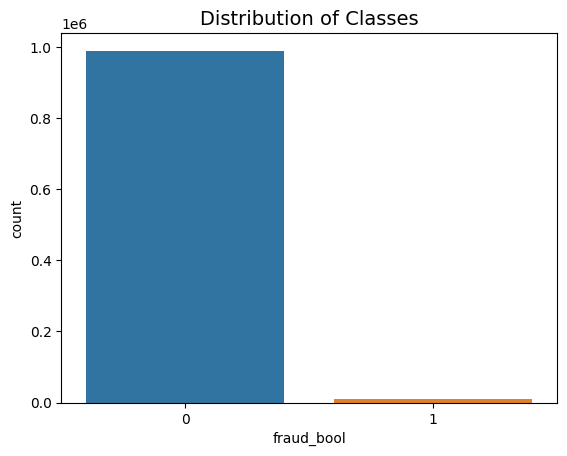

In [6]:
# The classes are heavily imbalanced.
print('No Frauds', round(df['fraud_bool'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['fraud_bool'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

sns.countplot('fraud_bool', data=df)
plt.title('Distribution of Classes', fontsize=14)
plt.show()

In [7]:
#splitting the data

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

X = df.drop('fraud_bool', axis=1)
y = df['fraud_bool']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

s = (original_Xtrain.dtypes == 'object') # list of column-names and whether they contain categorical features
object_cols = list(s[s].index) # All the columns containing these features
print(X[object_cols])

Train: [ 97621  97622  97623 ... 999997 999998 999999] Test: [     0      1      2 ... 200611 200612 200613]
Train: [     0      1      2 ... 999997 999998 999999] Test: [ 97621  97622  97623 ... 400801 400802 400803]
Train: [     0      1      2 ... 999997 999998 999999] Test: [385152 385153 385154 ... 600045 600046 600047]
Train: [     0      1      2 ... 999997 999998 999999] Test: [513780 513781 513782 ... 800750 800751 800752]
Train: [     0      1      2 ... 800750 800751 800752] Test: [753644 753645 753646 ... 999997 999998 999999]
       payment_type employment_status housing_status    source  device_os
0                AA                CA             BA  INTERNET    windows
1                AB                CA             BA  INTERNET    windows
2                AC                CB             BA  INTERNET      other
3                AB                CA             BA  INTERNET      linux
4                AB                CA             BA  INTERNET  macintosh
...        

In [8]:
#use random undersampling
# Lets shuffle the data before creating the subsamples
df = df.sample(frac=1)

# amount of fraud.
fraud_df = df.loc[df['fraud_bool'] == 1]
non_fraud_df = df.loc[df['fraud_bool'] == 0][:11029] #number of frauds

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
426756,0,0.6,0.996326,-1,68,30,0.008208,-1.164395,AB,1012,...,0,200.0,0,INTERNET,4.025614,macintosh,1,1,0,1
621439,1,0.9,0.132758,13,15,40,0.008044,-1.137630,AC,1515,...,0,200.0,0,INTERNET,4.576071,other,0,1,0,0
501525,0,0.7,0.826419,221,13,20,0.005599,-1.211991,AD,937,...,0,200.0,0,INTERNET,10.856681,linux,1,1,0,1
983738,0,0.8,0.191589,-1,195,40,0.020554,-1.160407,AB,148,...,0,1500.0,0,INTERNET,5.625228,other,1,1,0,4
367046,0,0.8,0.676690,-1,82,20,0.006687,3.884193,AA,3782,...,0,510.0,0,INTERNET,10.040548,windows,1,1,0,2


Distribution of Classes in Subsample
0    0.5
1    0.5
Name: fraud_bool, dtype: float64


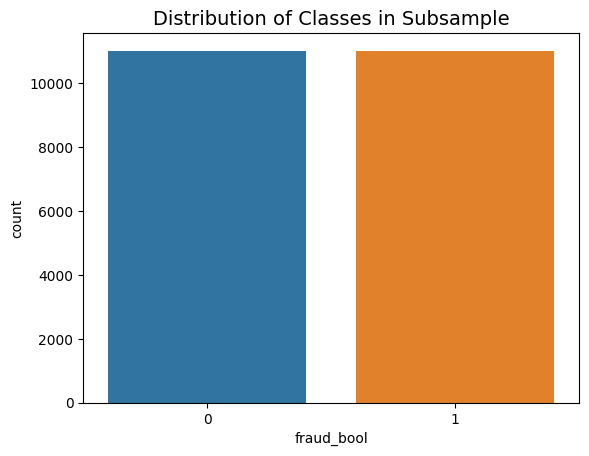

In [9]:
print('Distribution of Classes in Subsample')
print(new_df['fraud_bool'].value_counts()/len(new_df))
sns.countplot('fraud_bool', data=new_df)
plt.title('Distribution of Classes in Subsample', fontsize=14)
plt.show()

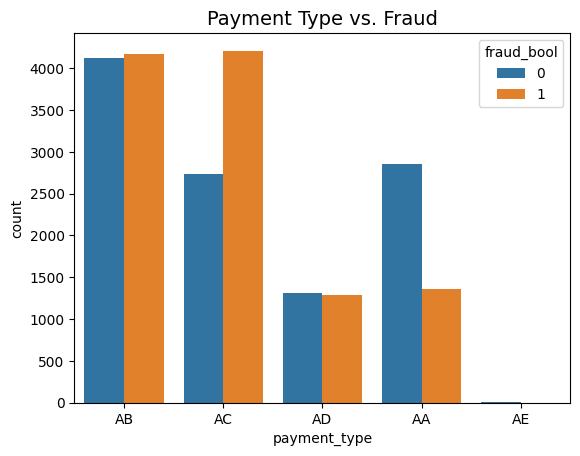

In [10]:
#Further EDA with balanced subsample
#There are four categorical variables: payment_type, housing_status, source, device_os

#Correlations between fraud and categorical variables
sns.countplot(data=new_df, x="payment_type", hue="fraud_bool")
plt.title('Payment Type vs. Fraud', fontsize=14)
plt.show()
#AA payment types have a low number of fraud compared to non-fraud transactions
#AD and AB seem to be fairly balanced between fraud and non-fraud
#AC payment types have a disproportionately high number of fraud transactions

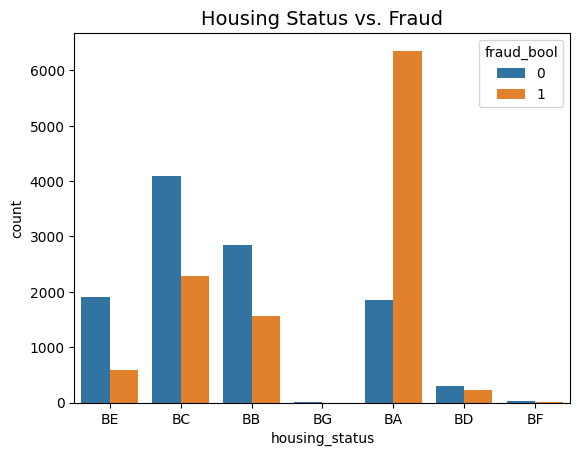

In [11]:
sns.countplot(data=new_df, x="housing_status", hue="fraud_bool")
plt.title('Housing Status vs. Fraud', fontsize=14)
plt.show()

#BB, BC, BE, and BD all have a high number of fraud compared to non-fraud transactions
#BA has a disproportionately high amount of fraud transactions

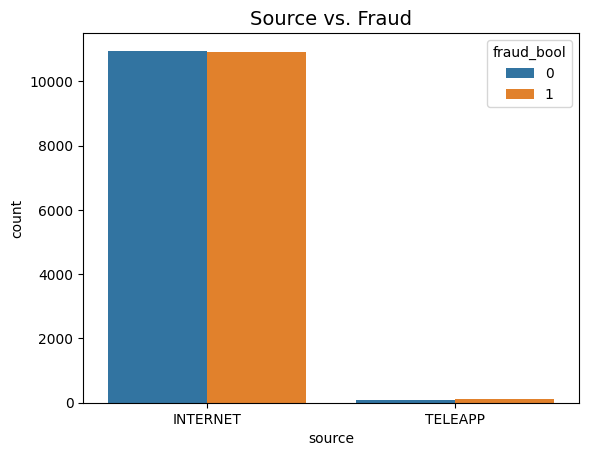

In [12]:
sns.countplot(data=new_df, x="source", hue="fraud_bool")
plt.title('Source vs. Fraud', fontsize=14)
plt.show()
#There are not many instances of teleapp, but it seems to have a higher percentage of fraud compared to non-fraud transactions

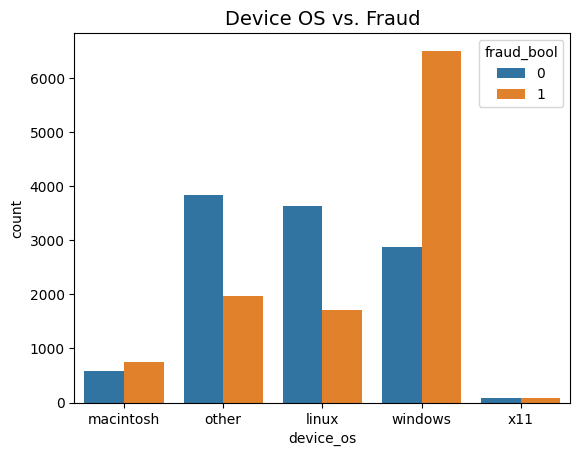

In [13]:
sns.countplot(data=new_df, x="device_os", hue="fraud_bool")
plt.title('Device OS vs. Fraud', fontsize=14)
plt.show()

#Linux, other device_os have much more fraud than non-fraud
#windows has disproportionately high fraud
#macintosh also has slightly more fraud than non-fraud

In [14]:
from itertools import product
import scipy.stats as ss

df_categorical = new_df.select_dtypes(exclude=['number'])
df_categorical = pd.concat([new_df['fraud_bool'], df_categorical], axis=1)

print(df_categorical.shape)
df_categorical.head()

(22058, 6)


,fraud_bool,payment_type,employment_status,housing_status,source,device_os
426756,0,AB,CE,BE,INTERNET,macintosh
621439,1,AC,CB,BC,INTERNET,other
501525,0,AD,CB,BB,INTERNET,linux
983738,0,AB,CA,BB,INTERNET,other
367046,0,AA,CA,BG,INTERNET,windows


In [15]:
var1 = ('fraud_bool', 'payment_type', 'employment_status', 'housing_status', 'source', 'device_os')
var2 = ('fraud_bool', 'payment_type', 'employment_status', 'housing_status', 'source', 'device_os')
var_prod = list(product(var1,var2, repeat = 1))
print(var_prod)

result = []
for i in var_prod:
    if i[0] != i[1]:
        result.append((i[0],i[1],list(ss.chi2_contingency(pd.crosstab(
                                    df_categorical[i[0]], df_categorical[i[1]])))[1]))
print(result)

[('fraud_bool', 'fraud_bool'), ('fraud_bool', 'payment_type'), ('fraud_bool', 'employment_status'), ('fraud_bool', 'housing_status'), ('fraud_bool', 'source'), ('fraud_bool', 'device_os'), ('payment_type', 'fraud_bool'), ('payment_type', 'payment_type'), ('payment_type', 'employment_status'), ('payment_type', 'housing_status'), ('payment_type', 'source'), ('payment_type', 'device_os'), ('employment_status', 'fraud_bool'), ('employment_status', 'payment_type'), ('employment_status', 'employment_status'), ('employment_status', 'housing_status'), ('employment_status', 'source'), ('employment_status', 'device_os'), ('housing_status', 'fraud_bool'), ('housing_status', 'payment_type'), ('housing_status', 'employment_status'), ('housing_status', 'housing_status'), ('housing_status', 'source'), ('housing_status', 'device_os'), ('source', 'fraud_bool'), ('source', 'payment_type'), ('source', 'employment_status'), ('source', 'housing_status'), ('source', 'source'), ('source', 'device_os'), ('dev

In [16]:
chi_test_output = pd.DataFrame(result, columns = ["var1", "var2", 
                                                       "coeff"])
## Using pivot function to convert the above DataFrame into a crosstab
chi_test_output.pivot(index="var1", columns="var2", values="coeff")

var2,device_os,employment_status,fraud_bool,housing_status,payment_type,source
var1,,,,,,
device_os,NaN,2.274273e-105,0.000000e+00,1.953922e-236,1.053020e-85,3.710239e-33
employment_status,2.274273e-105,NaN,4.023259e-194,2.321045e-288,1.395066e-55,2.203620e-06
fraud_bool,0.000000e+00,4.023259e-194,NaN,0.000000e+00,8.545031e-180,1.619684e-02
housing_status,1.953922e-236,2.321045e-288,0.000000e+00,NaN,5.034824e-162,3.241623e-03
payment_type,1.053020e-85,1.395066e-55,8.545031e-180,5.034824e-162,NaN,4.505598e-17
source,3.710239e-33,2.203620e-06,1.619684e-02,3.241623e-03,4.505598e-17,NaN


In [17]:
#outlier detection
s = (new_df.dtypes != 'object') # list of column-names and whether they contain categorical features
numerical_cols = list(s[s].index) # All the columns containing these features

def Zscore_outlier(df, name):
    out=[]
    m = np.mean(df)
    sd = np.std(df)
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 3: 
            out.append(i)
    return out
    
print(new_df.shape)
    
for i in numerical_cols:
    # printing the third element of the column
    if (i != 'days_since_request' and i != 'zip_count_4w' and i != 'velocity_4w' and i != 'bank_months_count' and i != 'session_length_in_minutes' and i != 'device_fraud_count' and i != 'foreign_request'):
        new_df = new_df[~new_df[i].isin(Zscore_outlier(new_df[i], i))]
        
print(new_df.shape)


(22058, 32)
(18195, 32)


In [18]:
#classifiers with undersampling

X = new_df.drop('fraud_bool', axis=1)
y = new_df['fraud_bool']

from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

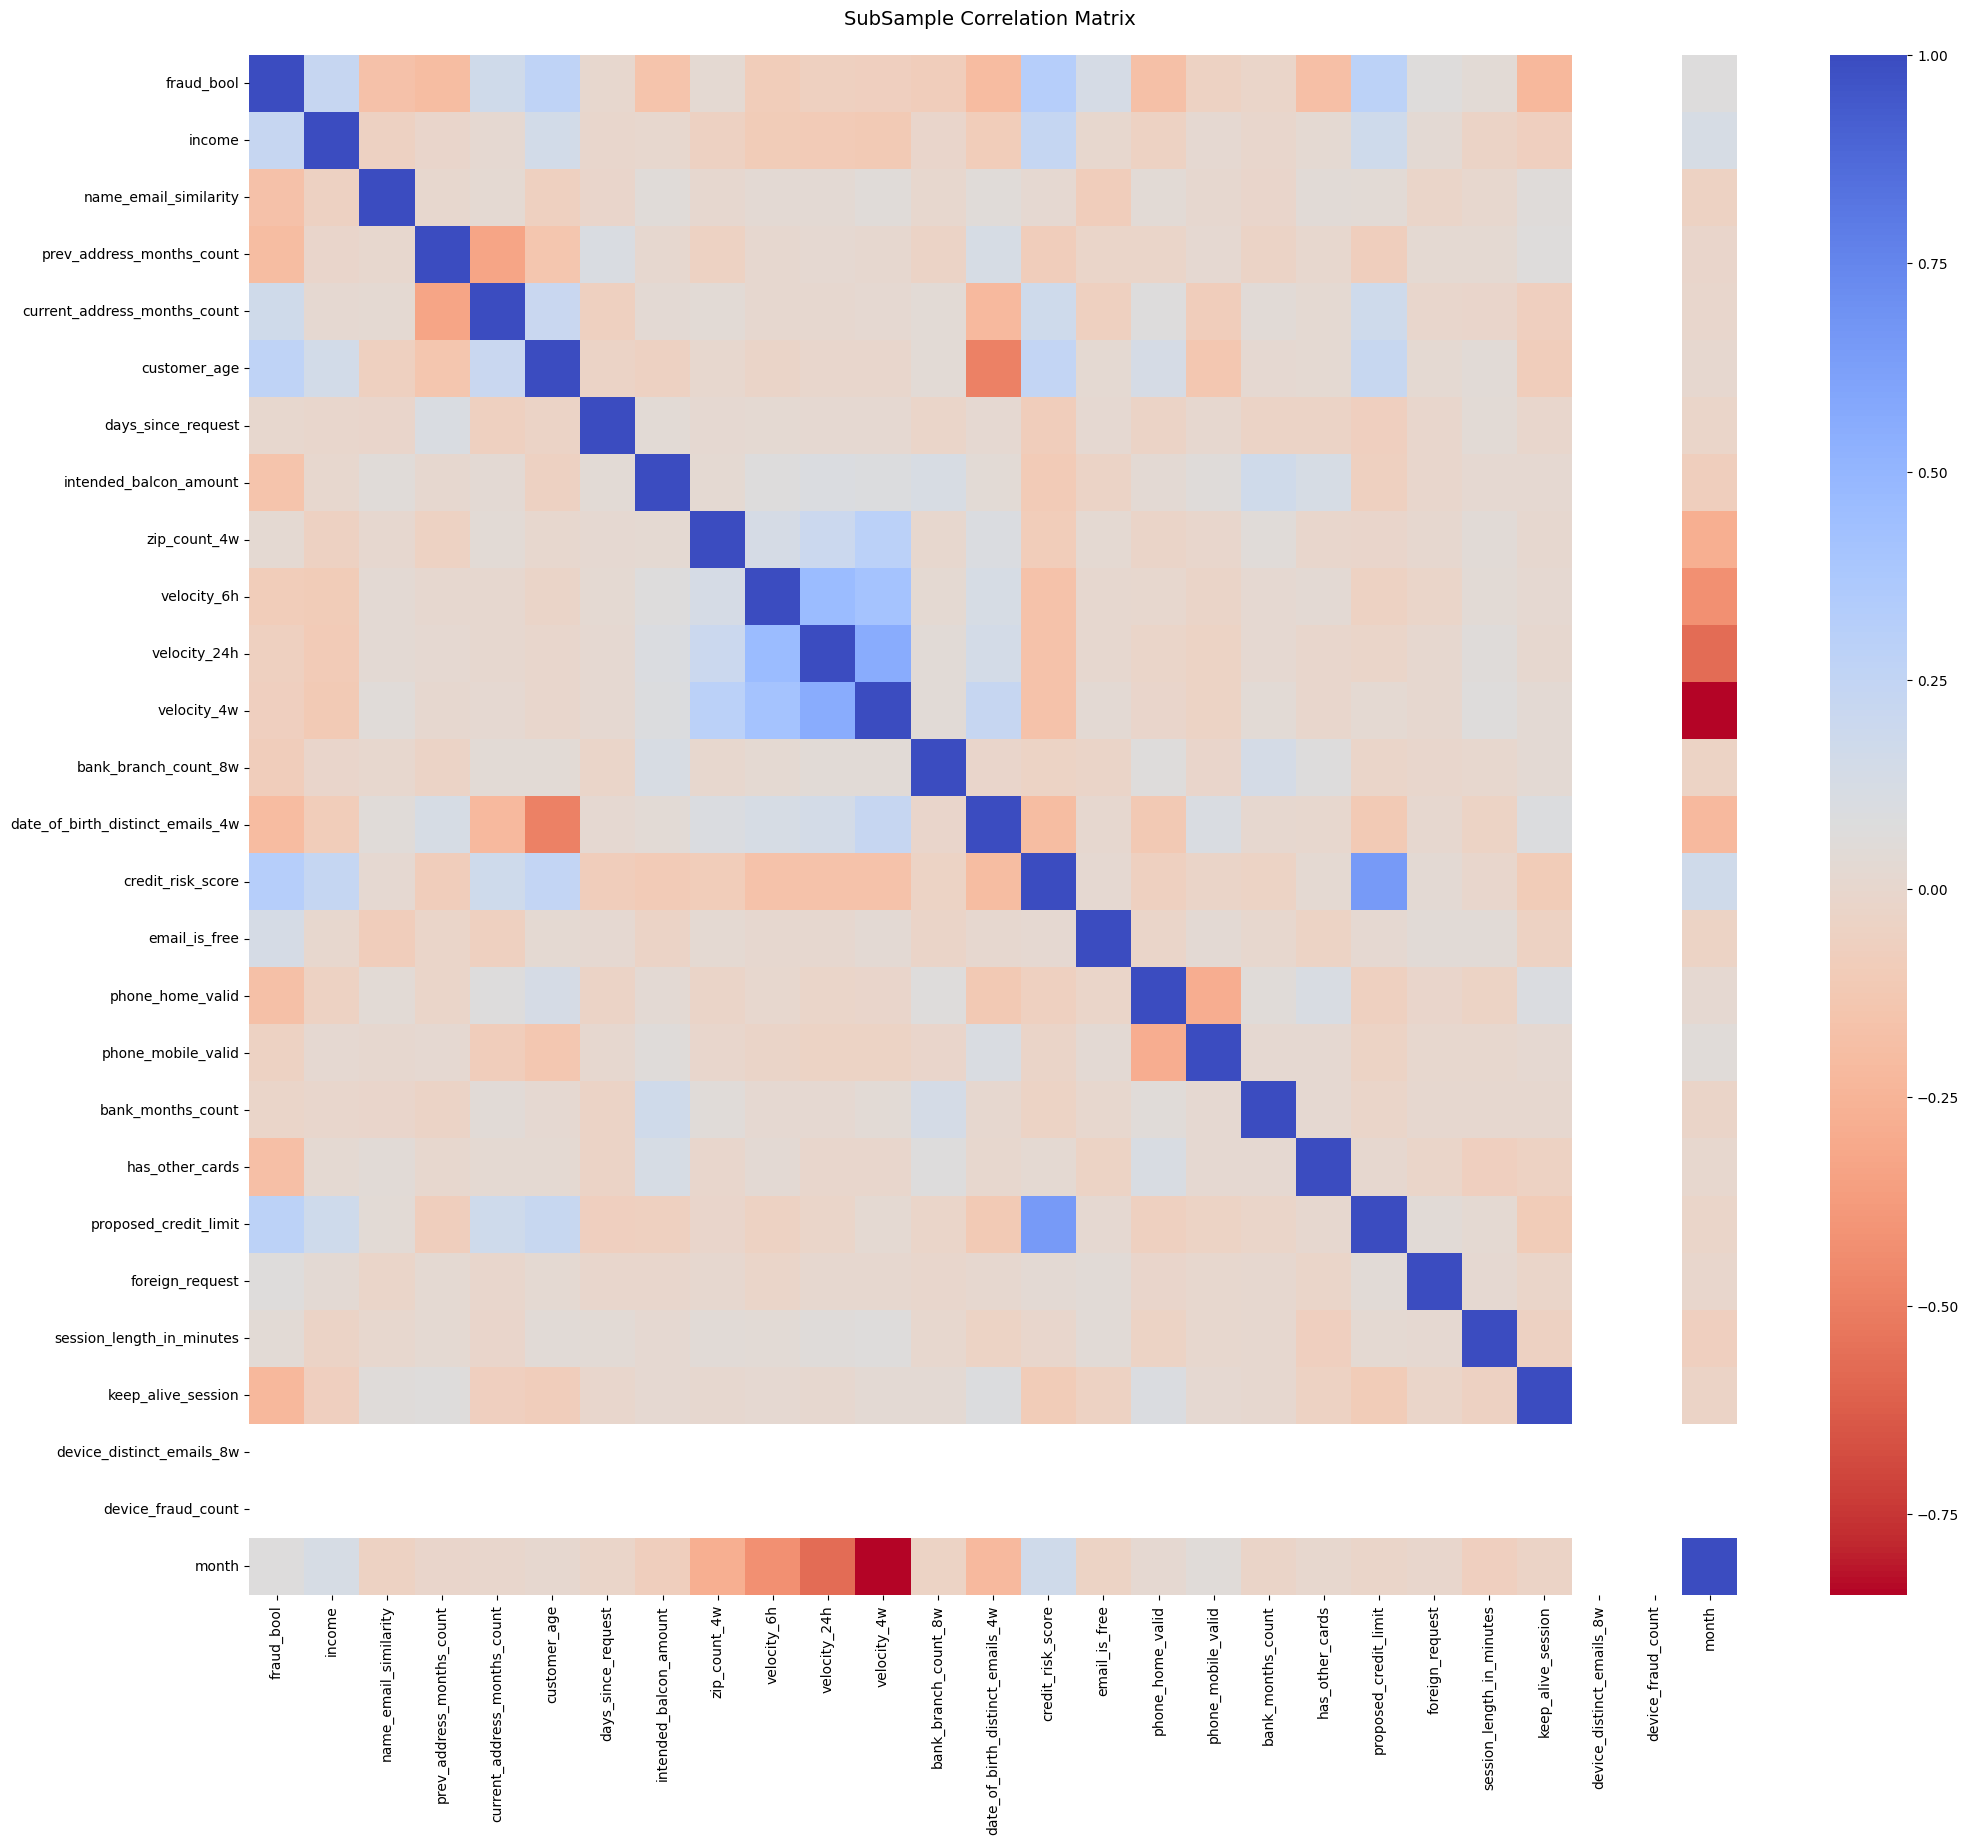

In [19]:
#correlation matrix to see relationship between fraud and continuous variables
# Subsample should be used for the matrix
#customer age, credit risk score, and proposed credit limit has strong positive correlation with fraud
#date_of_birth_distinct_emails_4w, phone_home_valid, has_other_cards, and keep_alive session have strong negative correlation

f, (ax1) = plt.subplots(1, 1, figsize=(24,20))

sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title('SubSample Correlation Matrix \n', fontsize=14)
plt.show()

In [20]:
s = (X_train.dtypes != 'object') # list of column-names and whether they contain categorical features
numerical_cols = list(s[s].index) # All the columns containing these features
for i in numerical_cols:
    # printing the third element of the column
    print (i, ": ", np.corrcoef(X_train[i], y_train)[0][1])

    #days_since_request, zip_count_4w, velocity_4w, bank_months_count, and session_length_in_minutes are very weakly correlated with fraud_bool
    #The absolute value of their correlation coefficient < 0.05

income :  0.22540543111562716
name_email_similarity :  -0.17185883554394682
prev_address_months_count :  -0.207423603915165
current_address_months_count :  0.1742514110697407
customer_age :  0.2784187043970621
days_since_request :  -0.0014615906523625414
intended_balcon_amount :  -0.1587359285110764
zip_count_4w :  0.023750334622038426
velocity_6h :  -0.09189439367918201
velocity_24h :  -0.06369073302039806
velocity_4w :  -0.06039607520614677
bank_branch_count_8w :  -0.0855236502295777
date_of_birth_distinct_emails_4w :  -0.2150297268907353
credit_risk_score :  0.31758298910727795
email_is_free :  0.1260749020139992
phone_home_valid :  -0.17058421507888735
phone_mobile_valid :  -0.06527579527543374
bank_months_count :  -0.015424908097867498
has_other_cards :  -0.18483696590169077
proposed_credit_limit :  0.286113862471569
foreign_request :  0.062485609287112984
session_length_in_minutes :  0.043707397634458835
keep_alive_session :  -0.22873275655495737
device_distinct_emails_8w :  nan


In [21]:
#drop features with low correlation from train and test
insignificant_cols = ['days_since_request', "zip_count_4w", "velocity_4w", "bank_months_count", 'session_length_in_minutes']
X_train = X_train.drop(insignificant_cols, axis=1)
X_test = X_test.drop(insignificant_cols, axis=1)

In [22]:
print(type(X_train))
#One hot encoding
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore') # ignore any features in the test set that were not present in the training set
# Get one-hot-encoded columns
ohe_cols_train = pd.DataFrame(ohe.fit_transform(X_train[object_cols]))
ohe_cols_test = pd.DataFrame(ohe.transform(X_test[object_cols]))
print(type(X_train))
# Set the index of the transformed data to match the original data
ohe_cols_train.index = X_train.index
ohe_cols_test.index = X_test.index
# Remove the object columns from the training and test data
num_X_train = X_train.drop(object_cols, axis=1)
num_X_test = X_test.drop(object_cols, axis=1)
# Concatenate the numerical data with the transformed categorical data
X_train = pd.concat([num_X_train, ohe_cols_train], axis=1)
X_test = pd.concat([num_X_test, ohe_cols_test], axis=1)
# Newer versions of sklearn require the column names to be strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler = StandardScaler()

print(type(X_train))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [23]:
#Try to improve scores by imputing missing values
from sklearn.impute import SimpleImputer

imputer_cols = ["prev_address_months_count", "current_address_months_count"]
imputer = SimpleImputer()
X_train[imputer_cols] = imputer.fit_transform(X_train[imputer_cols])
X_test[imputer_cols] = imputer.fit_transform(X_test[imputer_cols])

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "SupportVectorClassifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "NaiveBayes": GaussianNB()
}

from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 80.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 75.0 % accuracy score
Classifiers:  SVC Has a training score of 80.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 70.0 % accuracy score
Classifiers:  RandomForestClassifier Has a training score of 79.0 % accuracy score
Classifiers:  GaussianNB Has a training score of 63.0 % accuracy score


In [25]:
from sklearn.model_selection import RandomizedSearchCV

# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.01]}

grid_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
log_reg = grid_log_reg.best_estimator_
print(log_reg)
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')

LogisticRegression(C=0.01)
Logistic Regression Cross Validation Score:  79.53%


In [26]:
knears_params = {"n_neighbors": list(range(3,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = RandomizedSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_
knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

Knears Neighbors Cross Validation Score 73.94%


In [27]:
# Support Vector Classifier
svc_params = {'C': [0.7], 'kernel': ['rbf']}
grid_svc = RandomizedSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_
print(svc)
svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

#SVC C=0.7 is best

SVC(C=0.7)
Support Vector Classifier Cross Validation Score 79.66%


In [28]:
#DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
            "min_samples_leaf": list(range(5,7,1))}
grid_tree = RandomizedSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

#tree best estimator
tree_clf = grid_tree.best_estimator_


tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

DecisionTree Classifier Cross Validation Score 73.57%


In [29]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 550, stop = 650, num = 10)]
# Number of features to consider at every split
max_features = ['sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(100, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [550, 561, 572, 583, 594, 605, 616, 627, 638, 650], 'max_features': ['sqrt'], 'max_depth': [100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, None], 'min_samples_split': [10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [30]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)
#RandomForestClassifier(bootstrap=False, max_depth=110, min_samples_split=10, n_estimators=600)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [100, 101, 102, 103, 104,
                                                      105, 106, 107, 108, 109,
                                                      110, None],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [10],
                                        'n_estimators': [550, 561, 572, 583,
                                                         594, 605, 616, 627,
                                                         638, 650]},
                   random_state=42, verbose=2)

In [31]:
forest_clf = rf_random.best_estimator_
print(forest_clf) #DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)
forest_score = cross_val_score(forest_clf, X_train, y_train, cv=5)
print('RandomForest Classifier Cross Validation Score', round(forest_score.mean() * 100, 2).astype(str) + '%')

RandomForestClassifier(bootstrap=False, max_depth=101, min_samples_split=10,
                       n_estimators=550)
RandomForest Classifier Cross Validation Score 80.13%


In [32]:
#AUC Scores
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
# Create a DataFrame with all the scores and the classifiers names.

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5, method="decision_function")
knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)
svc_pred = cross_val_predict(svc, X_train, y_train, cv=5)
tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)
forest_pred = cross_val_predict(forest_clf, X_train, y_train, cv=5)

from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Machine: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree: ', roc_auc_score(y_train, tree_pred))
print('Random Forest: ', roc_auc_score(y_train, forest_pred))

Logistic Regression:  0.8726710852271495
KNears Neighbors:  0.7371884788392543
Support Vector Machine:  0.7961817185433427
Decision Tree:  0.7362467096115902
Random Forest:  0.8001114648559572


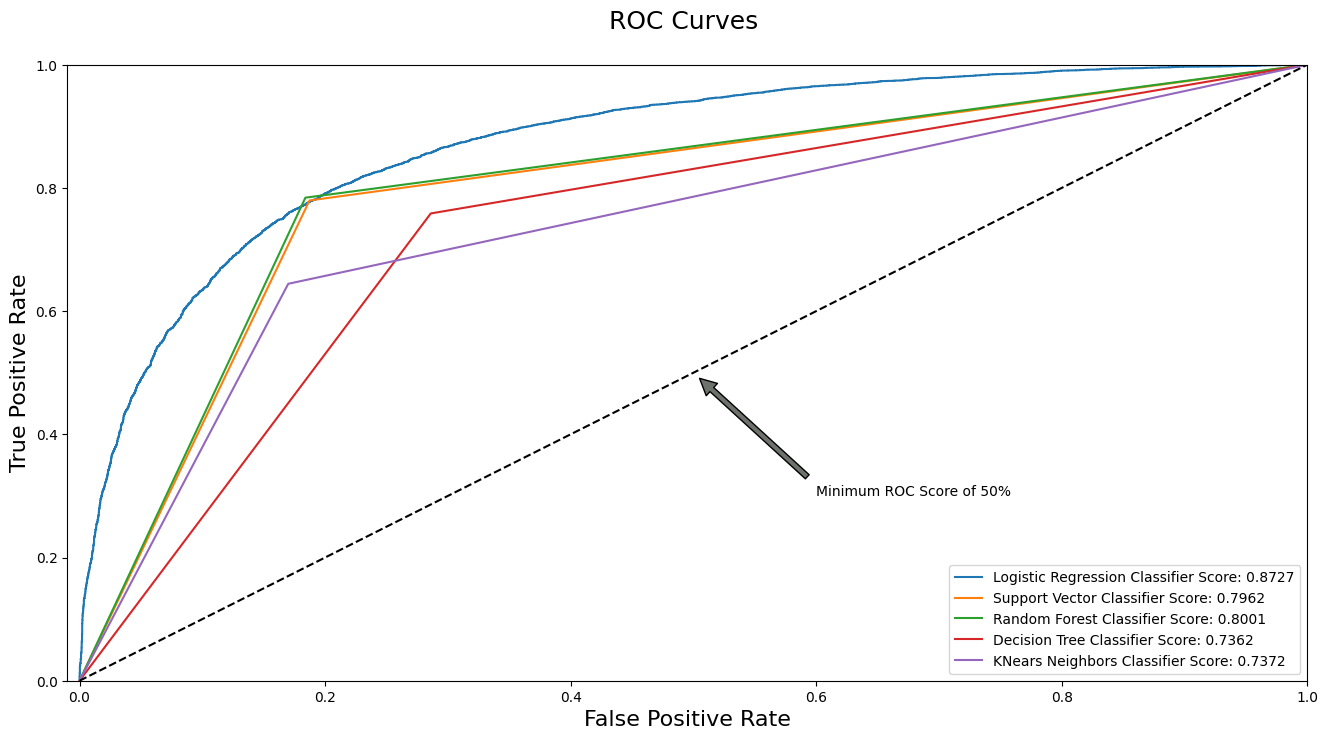

In [33]:
#plot ROC curves

log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_thresold = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)
forest_fpr, forest_tpr, forest_threshold = roc_curve(y_train, forest_pred)


def graph_roc_curve_multiple(log_fpr, log_tpr, svc_fpr, svc_tpr, forest_fpr, forest_tpr, knear_fpr, knear_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curves \n', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(forest_fpr, forest_tpr, label='Random Forest Classifier Score: {:.4f}'.format(roc_auc_score(y_train, forest_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50%', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, svc_fpr, svc_tpr, forest_fpr, forest_tpr, knear_fpr, knear_tpr, tree_fpr, tree_tpr)
plt.show()


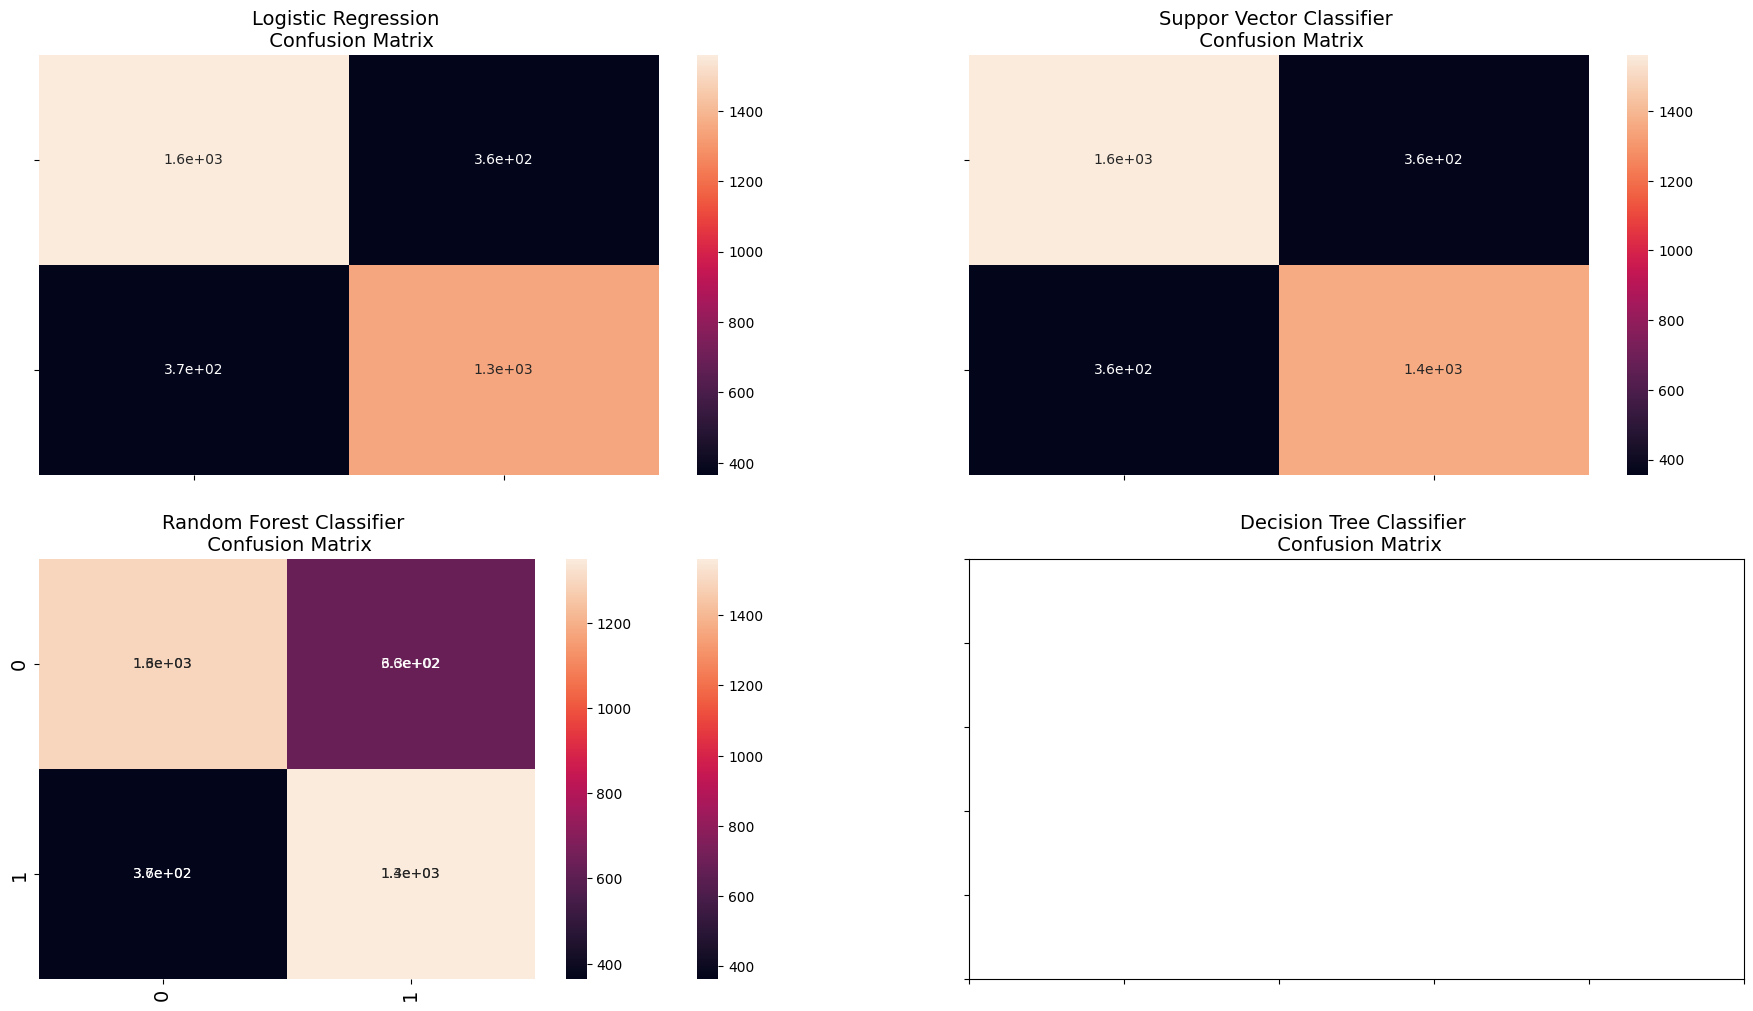

In [34]:
#plot confusion matrices for top 3 curves
from sklearn.metrics import confusion_matrix
#True negatives in top-left
#False negatives in top-right
#False positives in bottom-left
#true positives in bottom-right

y_pred_log_reg = log_reg.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_forest = forest_clf.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)

log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
svc_cf = confusion_matrix(y_test, y_pred_svc)
forest_cf = confusion_matrix(y_test, y_pred_forest)
tree_clf = confusion_matrix(y_test, y_pred_tree)

fig, ax = plt.subplots(2, 2,figsize=(22,12))

sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(svc_cf, ax=ax[0][1], annot=True)
ax[0][1].set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(forest_cf, ax=ax[1][0], annot=True)
ax[1][0].set_title("Random Forest Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)


sns.heatmap(tree_clf, ax=ax[1][0], annot=True)
ax[1][1].set_title("Decision Tree Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)


plt.show()

In [35]:
from sklearn.metrics import classification_report

print('Logistic Regression:')
print(classification_report(y_test, y_pred_log_reg))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_svc))

print('Random Forest Classifier:')
print(classification_report(y_test, y_pred_forest))

#max F1 score = 0.81

Logistic Regression:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1924
           1       0.79      0.78      0.79      1715

    accuracy                           0.80      3639
   macro avg       0.80      0.80      0.80      3639
weighted avg       0.80      0.80      0.80      3639

Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1924
           1       0.79      0.79      0.79      1715

    accuracy                           0.80      3639
   macro avg       0.80      0.80      0.80      3639
weighted avg       0.80      0.80      0.80      3639

Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1924
           1       0.79      0.78      0.79      1715

    accuracy                           0.80      3639
   macro avg       0.80      0.80      0.80      3639
